In [1]:
# question 1

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


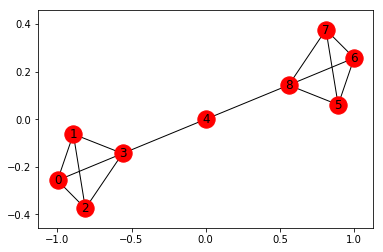

In [3]:
with open('input.txt', 'r') as f:
    l = [[int(num) for num in line.split(' ')] for line in f]
node_num = l[0]
del l[0]
np_am = np.array(l)
G = nx.from_numpy_matrix(np_am)
G2= nx.from_numpy_matrix(np_am)
nx.draw_networkx(G, with_label=True)  
plt.show()

In [4]:
def edge_to_remove(G):
    path_length = dict(nx.all_pairs_shortest_path_length(G))
    path = dict(nx.all_pairs_shortest_path(G))
    l= len(path_length)
    temp = list(G.edges.keys())
    edgelist = np.array(temp)
    l2 = len(temp)
    betweeness = []
    highest_betweeness = 0
    highest_lists = []
    
    for i in range(l2):
        betweeness.append(0)
        for j in path.keys():
            for k in path[j].keys():
                if (edgelist[i][0] in path[j][k] and edgelist[i][1] in path[j][k]):
                    betweeness[i] = betweeness[i] +1

    highest_betweeness = (np.array(betweeness)).max()
    for n in range(l2):
        if betweeness[n] == highest_betweeness:
            highest_lists.append(temp[n])
    return highest_lists
    
            

In [5]:
def grivan(G):
    print ('network decomposition:')
    community_list = []
    l=0
    while ( l != int(node_num[0])):
        G.remove_edges_from(edge_to_remove(G))
        c =nx.connected_component_subgraphs(G)
        a = 0
        cluster = 0
        community = []
        sort_len = []
        for i in c:
            community.append(list(i))
            community[a].sort()
            community.sort(key = len, reverse = True)
            a = a+1
        l = a
        cluster = cluster +1
        community_list.append(community)
        
        print (tuple(community))
    return community_list # return the cluster lists


In [6]:
comm = grivan(G)

network decomposition:
([0, 1, 2, 3], [5, 6, 7, 8], [4])
([0], [1], [2], [3], [4], [5], [6], [7], [8])


In [7]:
def modularity(F, comm): # calculate the modularity of the group
    m = nx.number_of_edges(F)
    total_modu =0;
    c = len(comm)
    
    for part in range (c): #get all the node from edge
        rank = len(comm[part])
        for node1 in range(rank):
            i = comm[part][node1]
            for node2 in range(rank):
                j = comm[part][node2]
                if (F.has_edge(i,j)):
                    Aij = 1
                else : 
                    Aij = 0
                ki= F.degree[i]
                kj= F.degree[j]
                Qij = (Aij - ki*kj/(2*m))/(2*m)
                total_modu += Qij
    print (c, " clusters: modularity ", total_modu )
    return total_modu


In [8]:
optimal = -9999
optimal_no = 0;
cluster_no = len(comm)

for i in range (cluster_no):
    temp = modularity(G2,comm[i])
    if (temp > optimal):
        optimal = temp;
    oprimal_no = i

print ("optimal_structure: ", tuple(comm[optimal_no]))


3  clusters: modularity  0.4209183673469388
9  clusters: modularity  -0.11479591836734694
optimal_structure:  ([0, 1, 2, 3], [5, 6, 7, 8], [4])


In [9]:
#question2

/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


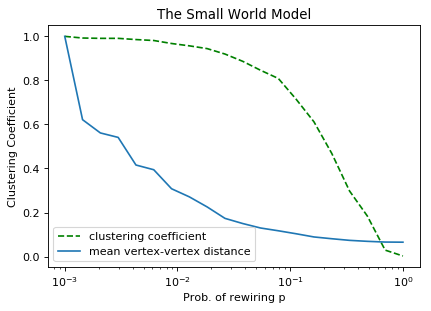

In [10]:
x =np.logspace(-3,0, num=20)
y1 = []
y2 = []

for n in x:
    F = nx.watts_strogatz_graph(1000,4,n,0)
    y1.append(nx.average_clustering(F)*2)
    y2.append(nx.average_shortest_path_length(F))

value = np.array(y2)
y2 = value/value.max()

value2 = np.array(y1)
y1 = value2/value2.max()

p = plt.figure(figsize=(6,4), dpi=80)
plt.title('The Small World Model')
plt.ylabel('Clustering Coefficient')
plt.xlabel('Prob. of rewiring p')
p3 = p.add_subplot(111)
p3.set_xscale("log")
p3.plot(x, y1,'g--',label = 'clustering coefficient')
p3.plot(x, y2,label = 'mean vertex-vertex distance')
p3.legend()
plt.show()
